<a href="https://colab.research.google.com/github/kadamhari825/Life-Expectancy-EDA/blob/main/Life_Expectancy_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd   # pandas for data manupalation.
import numpy as np    # Numerical python for numerical operations.

# Visualization stack
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataframe
df  = pd.read_csv('Life Expectancy Data.csv')
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [ ]:
origional_df = df.copy()

# we have white spaces before and after the column names. we need to remove that.
df = df.rename(columns=lambda x: x.strip())
print('The shape of Data Frame is:', df.shape)

The shape of Data Frame is: (2938, 22)


In [ ]:
# Number of null values in data.
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
(df.isna().sum()/df.shape[0]) * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

We are not removing null values here because doing so we would be eliminating half of records in data frame.

In [ ]:
# We are dropping only rows where we have null values.

drop_df = df[df['Life expectancy'].isna()]
drop_df.index
df.drop([624, 769, 1650, 1715, 1812, 1909, 1958, 2167, 2216, 2713], axis  = 0, inplace= True)

We removed only those records where we have null values in Life Expectancy feature.

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
""" info() function gives us count of null values and datatype of features variables so that 
    we can change if required."""
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [ ]:
# short stastical summary of all numerical features in dataframe.

df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Correlation Matrix:

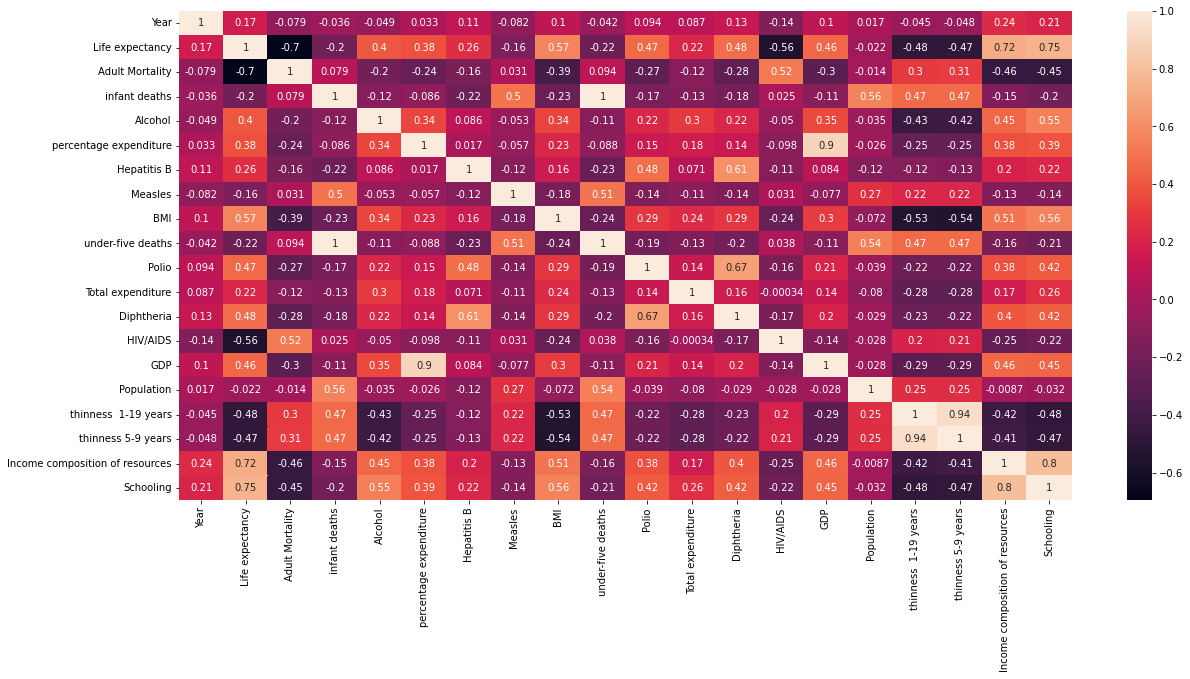

In [ ]:
plt.figure(figsize = (20,9))
sns.heatmap(df.corr(), annot = True)

#### Inferences:
1. Features like Adult Mortality, HIV/AIDS,Thinness  1-19 years and thinness 5-9 years have strong negative correlation   withLife expectancy.
2. Schooling,Income composition of resources, GDP, Diphtheria, BMI, Polio, Alcohol have positive correllation with Life
   expectany in the world.

#### Contries which are best to live in terms of life expentancy.

In [ ]:
temp_df = df.groupby(by =['Country','Status'])['Life expectancy'].mean().sort_values(ascending 
                                                                                     = False)
temp_df = temp_df.reset_index()
temp_df.head(10)

,Country,Status,Life expectancy
0,Japan,Developed,82.53750
1,Sweden,Developed,82.51875
2,Iceland,Developed,82.44375
3,Switzerland,Developed,82.33125
4,France,Developing,82.21875
5,Italy,Developed,82.18750
6,Spain,Developed,82.06875
7,Australia,Developed,81.81250
8,Norway,Developed,81.79375
9,Canada,Developing,81.68750


#### Developed countries where Life expectancy is least:

In [ ]:
temp_df[temp_df['Status'] == 'Developed'].tail(10)

,Country,Status,Life expectancy
30,United States of America,Developed,78.06250
33,Czechia,Developed,76.76875
36,Croatia,Developed,76.11875
42,Poland,Developed,75.65000
50,Slovakia,Developed,74.75000
60,Romania,Developed,74.05000
65,Hungary,Developed,73.82500
67,Latvia,Developed,73.73125
86,Bulgaria,Developed,72.85000
87,Lithuania,Developed,72.80625


#### Top 10 developing countries in terms of Life expectancy:

In [ ]:
temp_df[temp_df['Status'] == 'Developing'].head(10)

,Country,Status,Life expectancy
4,France,Developing,82.21875
9,Canada,Developing,81.68750
13,Israel,Developing,81.30000
14,Greece,Developing,81.21875
19,Finland,Developing,80.71250
21,Republic of Korea,Developing,80.48750
27,Chile,Developing,79.45000
29,Costa Rica,Developing,78.59375
31,Cuba,Developing,77.97500
32,Qatar,Developing,77.03125


#### Bottom most countries interms of Life expectancy:

In [ ]:
temp_df.tail(10)

,Country,Status,Life expectancy
173,Nigeria,Developing,51.35625
174,Swaziland,Developing,51.32500
175,Zimbabwe,Developing,50.48750
176,Côte d'Ivoire,Developing,50.38750
177,Chad,Developing,50.38750
178,Malawi,Developing,49.89375
179,Angola,Developing,49.01875
180,Lesotho,Developing,48.78125
181,Central African Republic,Developing,48.51250
182,Sierra Leone,Developing,46.11250


### Comaparision of all countries in terms of life expectancy:

In [ ]:
px.bar(temp_df, x='Country', y='Life expectancy', height  = 600, width = 2000, color  = 'Country')

### Life expectancy trend over the globe from 2000 to 2015:

In [ ]:
temp_df = df.groupby(by ='Year')['Life expectancy'].mean().sort_values(ascending  = False)
temp_df = temp_df.reset_index()
temp_df.head(10)

,Year,Life expectancy
0,2015,71.616940
1,2014,71.536612
2,2013,71.236066
3,2012,70.916940
4,2011,70.654098
5,2010,70.048634
6,2009,69.938251
7,2008,69.427869
8,2007,69.036066
9,2006,68.667760


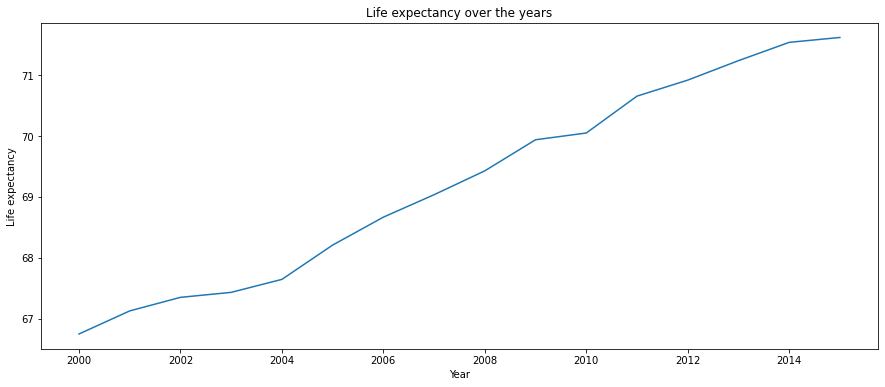

In [ ]:
plt.figure(figsize = (15,6))
sns.lineplot(data = temp_df, x = 'Year', y  = 'Life expectancy')
plt.title('Life expectancy over the years')
plt.show()

### Life expectany trend between developed and developing countries:

In [ ]:
temp_df = df.groupby(by =['Year','Status'])['Life expectancy'].mean()
temp_df = temp_df.reset_index()
temp_df

,Year,Status,Life expectancy
0,2000,Developed,76.803125
1,2000,Developing,64.619868
2,2001,Developed,77.128125
3,2001,Developing,65.009934
4,2002,Developed,77.546875
5,2002,Developing,65.190728
6,2003,Developed,77.940625
7,2003,Developing,65.206623
8,2004,Developed,78.384375
9,2004,Developing,65.370861


In [ ]:
px.line(temp_df, x = 'Year', y = 'Life expectancy', color = 'Status')

### Is mortality rate decreasing over the years?

In [ ]:
temp_df = df.groupby(by= ['Year'])['Adult Mortality','infant deaths','under-five deaths','Life expectancy'].mean()
temp_df = temp_df.reset_index()
temp_df

,Year,Adult Mortality,infant deaths,under-five deaths,Life expectancy
0,2000,181.475410,37.540984,53.726776,66.750273
1,2001,175.169399,36.825137,52.038251,67.128962
2,2002,171.437158,35.584699,50.300546,67.351366
3,2003,169.131148,34.874317,48.584699,67.433333
4,2004,186.262295,33.644809,47.092896,67.646448
5,2005,167.633880,32.366120,45.306011,68.209290
6,2006,170.404372,31.808743,44.273224,68.667760
7,2007,159.808743,30.612022,42.732240,69.036066
8,2008,174.519126,29.568306,41.322404,69.427869
9,2009,163.393443,28.956284,39.770492,69.938251


In [ ]:
px.line(temp_df, x = 'Year', y = ['Adult Mortality','infant deaths','under-five deaths',
                                  'Life expectancy'],)

Adult Mortality,infant deaths and under-five deaths are decreasing over the period.

#### Are life trethining diseases decreasing?

In [ ]:
temp_df = df.groupby(by= ['Year'])['Hepatitis B','Measles','Polio','Diphtheria', 'HIV/AIDS','Life expectancy'].mean()
temp_df = temp_df.reset_index()
temp_df

,Year,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Life expectancy
0,2000,74.035294,4663.792350,76.277778,73.627778,2.530055,66.750273
1,2001,73.957895,4640.262295,77.950000,76.661111,2.573770,67.128962
2,2002,76.522124,3204.754098,79.679558,78.883978,2.573770,67.351366
3,2003,74.099237,3708.792350,80.353591,78.867403,2.546995,67.433333
4,2004,77.985507,2805.497268,80.165746,79.823204,2.478689,67.646448
5,2005,80.911565,3200.551913,80.972376,81.674033,2.345902,68.209290
6,2006,81.894040,2063.224044,84.527473,82.236264,2.169399,68.667760
7,2007,81.584906,1557.540984,84.802198,84.318681,1.992896,69.036066
8,2008,83.644172,1523.229508,85.565934,84.857143,1.797268,69.427869
9,2009,84.277108,1522.606557,85.329670,85.060440,1.538798,69.938251


In [ ]:
px.line(temp_df, x = 'Year', y = ['Hepatitis B','Polio','Diphtheria', 'HIV/AIDS'])

#### PERCENTAGE EXPENDITURE

In [ ]:
temp_df = df.groupby(by = ['Country','Status'])['Total expenditure','Life expectancy'].mean().reset_index()
temp_df

,Country,Status,Total expenditure,Life expectancy
0,Afghanistan,Developing,8.252500,58.19375
1,Albania,Developing,5.945625,75.15625
2,Algeria,Developing,4.604000,73.61875
3,Angola,Developing,3.919333,49.01875
4,Antigua and Barbuda,Developing,4.791333,75.05625
...,...,...,...,...
178,Venezuela (Bolivarian Republic of),Developing,4.998667,73.38750
179,Viet Nam,Developing,5.977333,74.77500
180,Yemen,Developing,5.005333,63.86250
181,Zambia,Developing,5.824000,53.90625


In [ ]:
px.scatter(temp_df, x='Total expenditure',y ='Life expectancy', color = 'Status')

From the graph it is clear that  % expenditure on helthcare is not highly linked with Life expectancy.

#### Is population a reason behind having lower life expectancy?

In [ ]:
temp_df = df.groupby(by = 'Country')['Population','Life expectancy'].median().reset_index()
temp_df

,Country,Population,Life expectancy
0,Afghanistan,2924815.0,57.80
1,Albania,290456.5,75.60
2,Algeria,32440295.0,73.95
3,Angola,2891811.0,48.45
4,Antigua and Barbuda,NaN,75.10
...,...,...,...
178,Venezuela (Bolivarian Republic of),NaN,73.60
179,Viet Nam,NaN,74.80
180,Yemen,NaN,63.95
181,Zambia,1693549.5,56.55


In [ ]:
px.scatter(temp_df, y='Population',x ='Life expectancy',)

There is no Correlation between Population and Life expectancy from the plot. Because there are ample countries which have small population base and have lower life expectancy and even more countries that have more population but have lower life expectancy.

#### Is alcohol Abuse factor for lower Life expectancy?

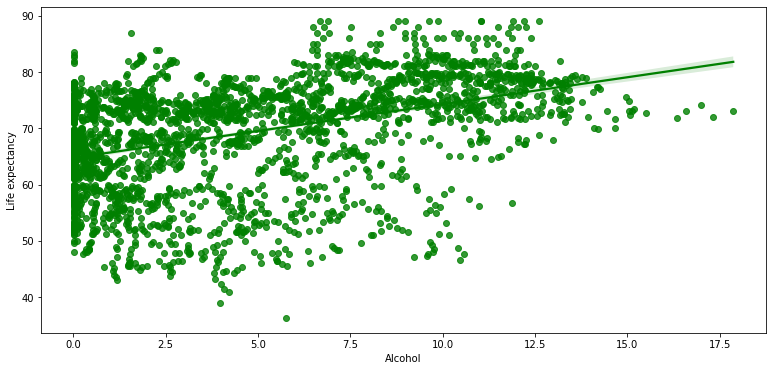

In [ ]:
plt.figure(figsize = (13,6))
sns.regplot(x ='Alcohol',y ='Life expectancy',data = df,color = 'g' )

There is Correlation between Alochol consumpation and Life expectancy.

#### Does schooling impacts Life Expectancy?

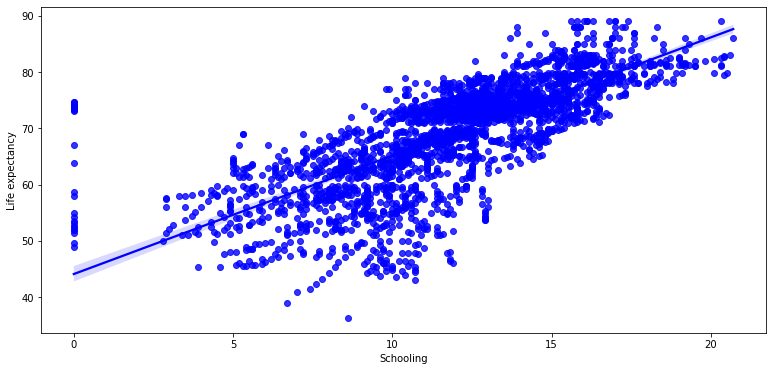

In [ ]:
plt.figure(figsize = (13,6))
sns.regplot(x ='Schooling',y ='Life expectancy',data = df,color = 'b')

Yes it does, Scooling has fairly correlated with life expecetancy. 


#### How having different resources at disposal impacts life expectancy?

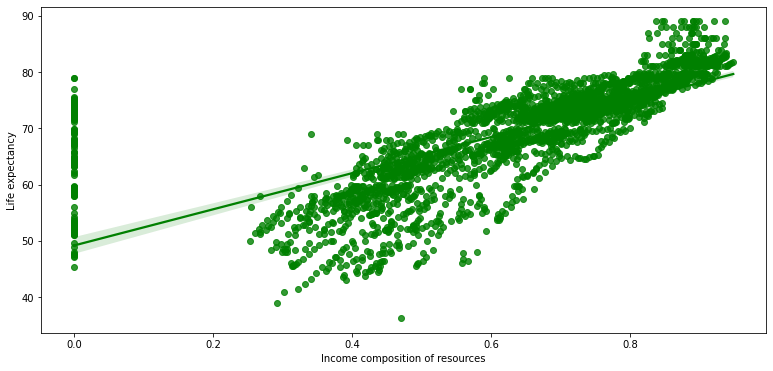

In [ ]:
plt.figure(figsize = (13,6))
sns.regplot(x ='Income composition of resources',y = 'Life expectancy',data = df,color = 'g')

The plot is little swayed by outliers but it is clear that Income composition of resources has strong impact on 
Life expectancy.

#### Does being Malnourished/Thin impacts Life expectancy?

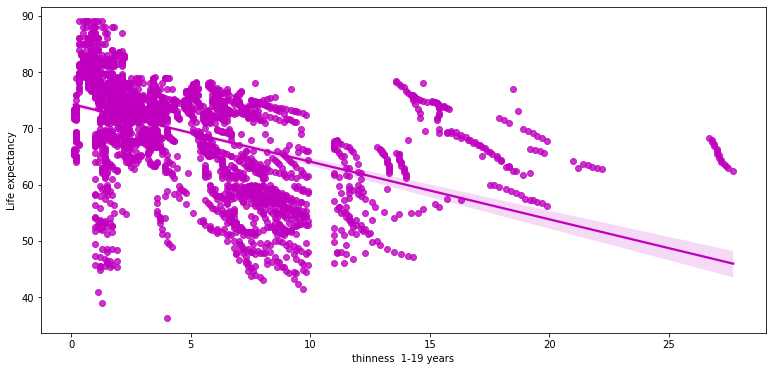

In [ ]:
plt.figure(figsize = (13,6))
sns.regplot(x ='thinness  1-19 years',y = 'Life expectancy',data = df,color = 'm')

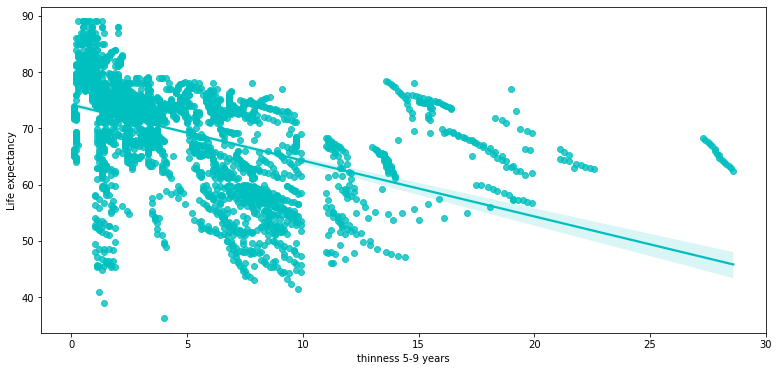

In [ ]:
plt.figure(figsize = (13,6))
sns.regplot(x ='thinness 5-9 years',y = 'Life expectancy',data = df,color = 'c')

Yes, The digree to which people are malnourished impacts Life expectancy but not linearly.

#### Does disease like HIV/AIDS play a role?

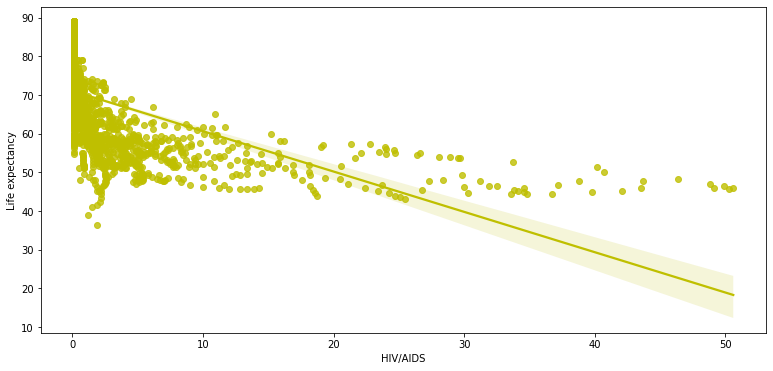

In [ ]:
plt.figure(figsize = (13,6))
sns.regplot(x ='HIV/AIDS',y = 'Life expectancy',data = df,color = 'y')

Yes, It plays Negative role in populations life expectancy.

#### Does Body mass index important in predicting Life expectancy?

The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m2

Text(0.5, 1.0, 'Life expectancy vs BMI')

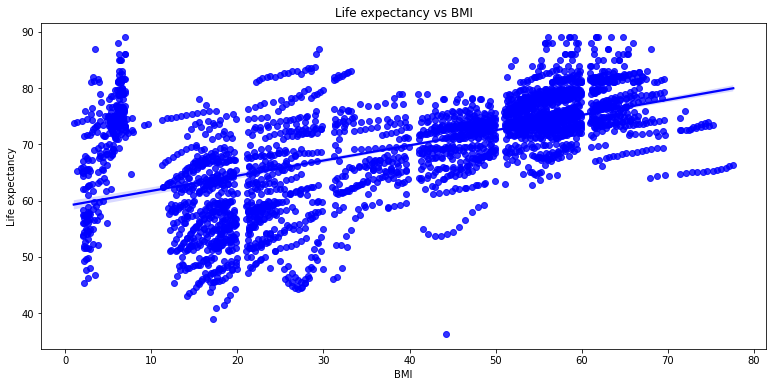

In [ ]:
plt.figure(figsize = (13,6))
sns.regplot(x ='BMI',y = 'Life expectancy',data = df,color = 'b')
plt.title('Life expectancy vs BMI')

From the plot life expectancy is fairly linear with Body Mass index.

#### Economy indicator GDP vs Life expectancy.

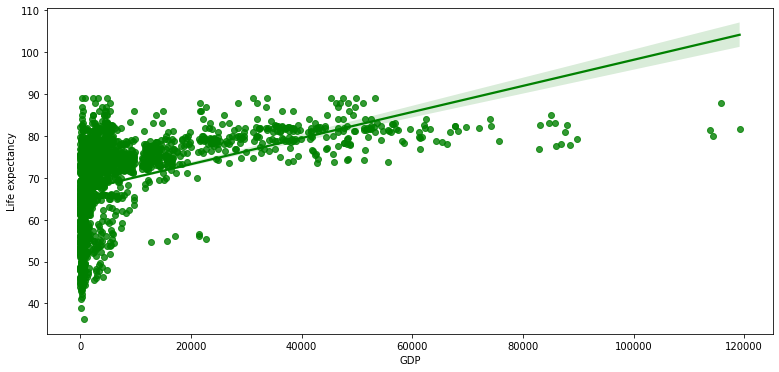

In [ ]:
plt.figure(figsize = (13,6))
sns.regplot(x ='GDP',y = 'Life expectancy',data = df,color = 'g')

In above graph regression line is pulled up by few outliers and also there are few countries which have lower GDP but high life expectancy so GDP figure is not deciding factor behind life expectancy.

#### POLIO VS LIFE EXPECTANCY

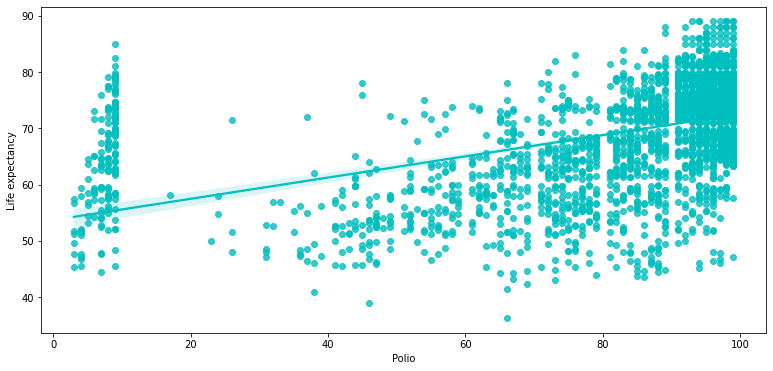

In [ ]:
plt.figure(figsize = (13,6))
sns.regplot(x ='Polio',y = 'Life expectancy',data = df,color = 'c')

## Conclusion:

1. In 15 year span there has been sharp rise in life expectancy in Developing countries from 64 years to 70 years.
2. Adult Mortality, Infact Mortality and Under five deths have been declining over the years and that contributed to 
   rise in Life expectancy
3. Life style measure like alcohol is Posiitively correlated with Life expectancy. So it is essentail that Policy 
   makers make policies which ristricts Alcohol consumption.
4. Except HIV/AIDS other diseases such as Hepatitis B,Measles and Diphtheria increased in numbers.
5. Unexpextedly % expenditure on healthcare and Population are not having concrete impact on Life expecetancy, which 
   shatterd my initial assumption.
6. Schooling,Income composition of resources,BMI and Polio are the feature which have shown significant impact on target
   variable.So these factors should be taken in account while authorities consider to inprove Life expectancy.
7. Also malnourishment below 20 years drags Life expectancy considerably.